# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

---
## 2. Load data

In [7]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [8]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [9]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [15]:
client_df = pd.read_csv('./client_data.csv')

client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [17]:
client_df.id.value_counts().value_counts()

count
1    14606
Name: count, dtype: int64

In [18]:
comb_df = pd.merge(client_df, diff, on="id")
comb_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,-0.003767,0.177779


In [19]:
comb_df.drop(["cons_gas_12m", "has_gas"], axis=1, inplace=True)
comb_df

,id,channel_sales,cons_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,-0.003767,0.177779


In [20]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [21]:
mean_price_df = price_df.groupby("id").agg(
    {
        "price_off_peak_var": "mean",
        "price_peak_var": "mean",
        "price_mid_peak_var": "mean",
        "price_off_peak_fix": "mean",
        "price_peak_fix": "mean",
        "price_mid_peak_fix": "mean",
    }
)
mean_price_df

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [22]:
comb_df = pd.merge(comb_df, mean_price_df, on="id")

In [23]:
comb_df

,id,channel_sales,cons_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,15.000,0,-0.008653,0.177779,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,6.000,1,-0.007395,0.236694,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,15.935,1,-0.006192,0.162916,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,11.000,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


In [28]:
comb_df['tenure'] = (comb_df['date_end'] - comb_df['date_activ']).dt.days // 365
comb_df.head()

,id,channel_sales,cons_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,6


In [32]:
comb_df.date_activ.max()

Timestamp('2014-09-01 00:00:00')

In [33]:
def months_since(df, col):
    reference_date = pd.to_datetime("2017-01-01")
    mon_col = (reference_date.year - df[col].dt.year) * 12 + (reference_date.month - df[col].dt.month)
    return mon_col
    
# Calculate the number of months from date_start to reference_date
comb_df['months_activ'] = months_since(comb_df, "date_activ")
comb_df['months_end'] = months_since(comb_df, "date_end")
comb_df['months_modif_prod'] = months_since(comb_df, "date_modif_prod")
comb_df['months_renewal'] = months_since(comb_df, "date_renewal")


In [34]:
comb_df

,id,channel_sales,cons_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure,months_activ,months_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,0.100749,0.066530,40.942265,22.352010,14.901340,3,43,7,14,19
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.007124,0.000000,44.311375,0.000000,0.000000,7,89,5,89,17
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.088421,0.000000,44.385450,0.000000,0.000000,6,81,9,81,21
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,0.000000,44.400265,0.000000,0.000000,6,82,10,82,22
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.103638,0.072865,40.688156,24.412893,16.275263,6,84,10,84,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,0.000000,0.000000,44.370635,0.000000,0.000000,3,56,8,20,32
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,0.095406,0.070817,59.015674,36.393379,8.345418,4,53,5,53,17
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,0.103794,0.073160,40.701732,24.421038,16.280694,4,59,11,59,23
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,0.007124,0.000000,44.311375,0.000000,0.000000,4,53,5,53,17


In [35]:
comb_df.drop(["date_activ", "date_end", "date_modif_prod", "date_renewal"], axis=1, inplace=True)
comb_df.head()

,id,channel_sales,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure,months_activ,months_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.100749,0.066530,40.942265,22.352010,14.901340,3,43,7,14,19
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.007124,0.000000,44.311375,0.000000,0.000000,7,89,5,89,17
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.088421,0.000000,44.385450,0.000000,0.000000,6,81,9,81,21
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000,0.000000,44.400265,0.000000,0.000000,6,82,10,82,22
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.103638,0.072865,40.688156,24.412893,16.275263,6,84,10,84,22


### Categorical Features

In [36]:
comb_df.channel_sales.value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [38]:
comb_df = pd.get_dummies(comb_df, columns=["channel_sales"], prefix="channel")
comb_df = comb_df.drop(columns=["channel_sddiedcslfslkckwlfkdpoeeailfpeds", "channel_epumfxlbckeskwekxbiuasklxalciiuu", "channel_fixdbufsefwooaasfcxdxadsiekoceaa"])
comb_df.head()

,id,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,tenure,months_activ,months_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,3,43,7,14,19,False,False,True,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,7,89,5,89,17,True,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,6,81,9,81,21,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,6,82,10,82,22,False,False,False,True,False
4,149d57cf92fc41cf94415803a877cb4b,4425,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,6,84,10,84,22,True,False,False,False,False


In [37]:
comb_df.origin_up.value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [39]:
comb_df = pd.get_dummies(comb_df, columns=["origin_up"], prefix="origin")
comb_df = comb_df.drop(columns=["origin_usapbepcfoloekilkwsdiboslwaxobdp", "origin_ewxeelcelemmiwuafmddpobolfuxioce", "origin_MISSING"])
comb_df.head()

,id,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,14,19,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,89,17,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,81,21,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,82,22,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,84,22,True,False,False,False,False,True,False,False


### Numerical Transformation

In [41]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        14606 non-null  object 
 1   cons_12m                                  14606 non-null  int64  
 2   cons_last_month                           14606 non-null  int64  
 3   forecast_cons_12m                         14606 non-null  float64
 4   forecast_cons_year                        14606 non-null  int64  
 5   forecast_discount_energy                  14606 non-null  float64
 6   forecast_meter_rent_12m                   14606 non-null  float64
 7   forecast_price_energy_off_peak            14606 non-null  float64
 8   forecast_price_energy_peak                14606 non-null  float64
 9   forecast_price_pow_off_peak               14606 non-null  float64
 10  imp_cons                          

In [42]:
comb_df.describe()

,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,...,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure,months_activ,months_end,months_modif_prod,months_renewal
count,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,...,0.052063,0.028276,42.928890,9.460874,6.097680,5.401821,71.511091,5.573463,48.370327,17.816925
std,5.734653e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,...,0.049879,0.035802,4.550759,12.053587,7.770748,1.663526,19.352836,3.493670,30.279646,3.888311
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,28.000000,-5.000000,12.000000,12.000000
25%,5.674750e+03,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,...,0.000000,0.000000,40.688156,0.000000,0.000000,4.000000,57.000000,3.000000,19.000000,15.000000
50%,1.411550e+04,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,...,0.084509,0.000000,44.281745,0.000000,0.000000,5.000000,70.000000,5.000000,43.000000,18.000000
75%,4.076375e+04,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,...,0.102479,0.072833,44.370635,24.372163,16.248109,6.000000,84.000000,9.000000,77.000000,21.000000
max,6.207104e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,...,0.196275,0.102951,59.286190,36.490689,16.818917,13.000000,164.000000,12.000000,164.000000,43.000000


<Axes: xlabel='imp_cons', ylabel='Density'>

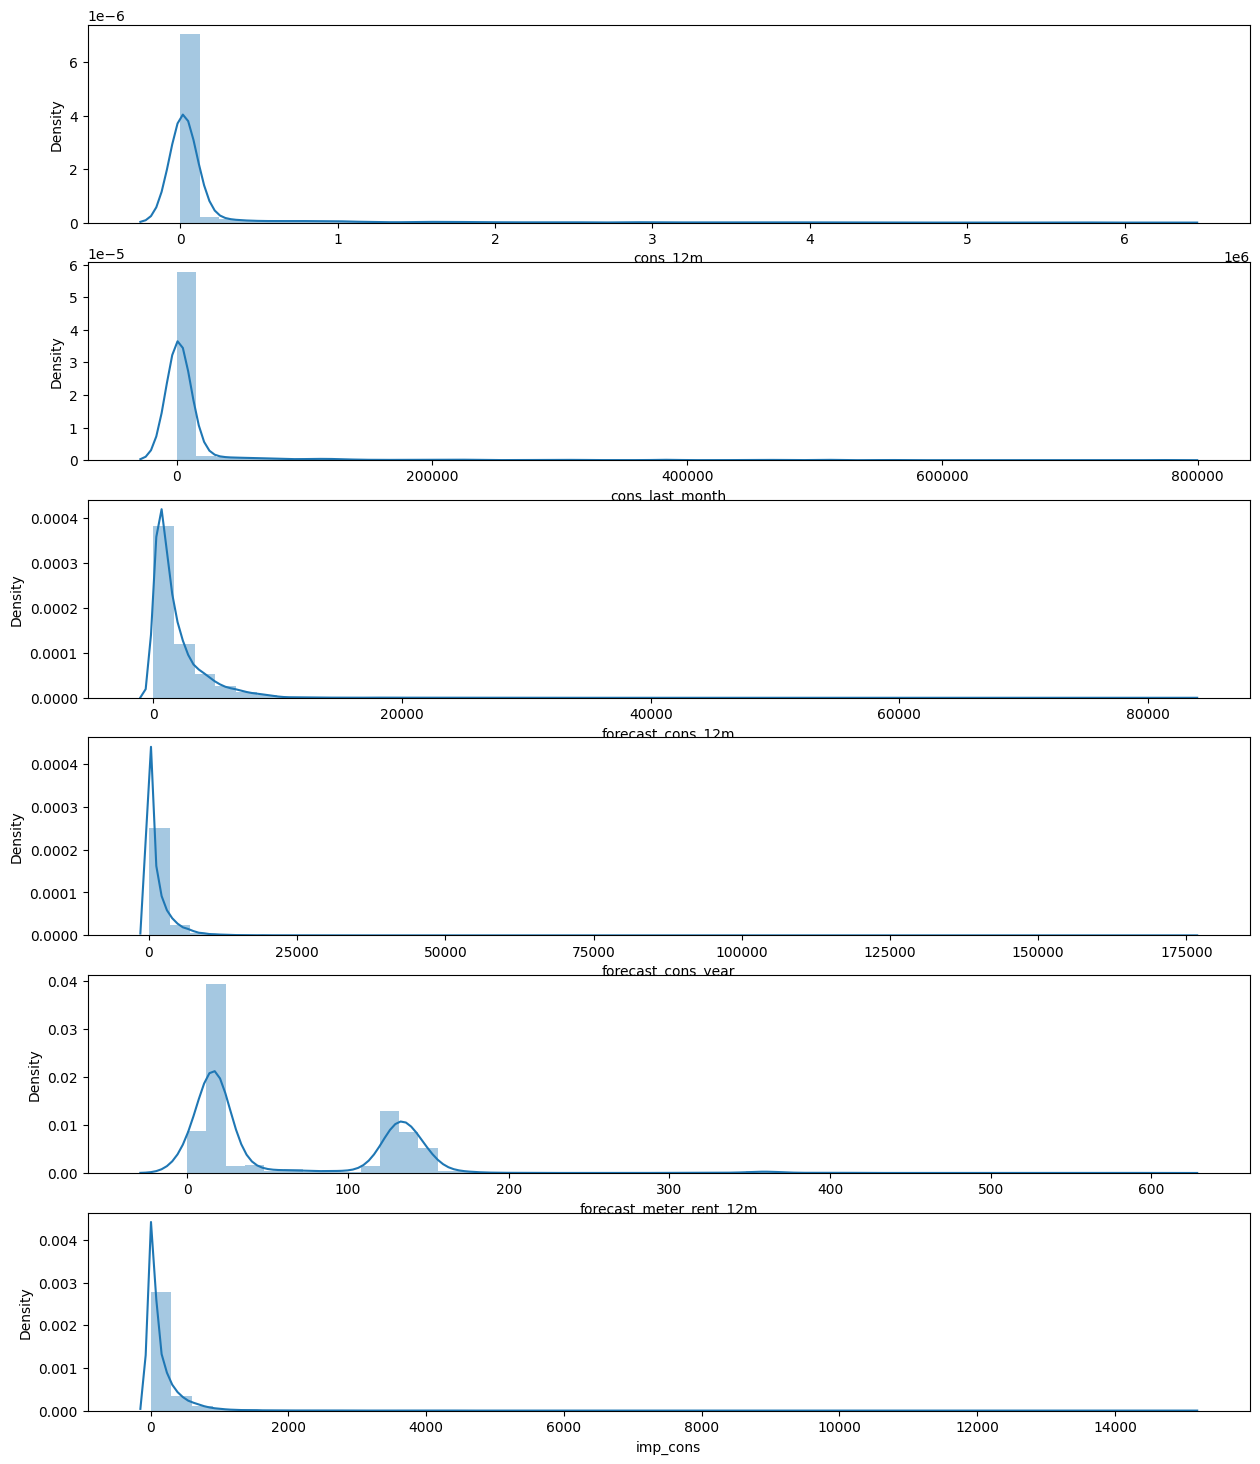

In [60]:
fig, ax = plt.subplots(nrows=6, figsize=(15,18))

sns.distplot(comb_df["cons_12m"], bins=50, ax=ax[0])
sns.distplot(comb_df["cons_last_month"], bins=50, ax=ax[1])
sns.distplot(comb_df["forecast_cons_12m"], bins=50, ax=ax[2])
sns.distplot(comb_df["forecast_cons_year"], bins=50, ax=ax[3])
sns.distplot(comb_df["forecast_meter_rent_12m"], bins=50, ax=ax[4])
sns.distplot(comb_df["imp_cons"], bins=50, ax=ax[5])

In [61]:
#Apply log10 transformation
comb_df["cons_12m"] = np.log10(comb_df["cons_12m"] + 1)
comb_df["cons_last_month"] = np.log10(comb_df["cons_last_month"] + 1)
comb_df["forecast_cons_12m"] = np.log10(comb_df["forecast_cons_12m"] + 1)
comb_df["forecast_cons_year"] = np.log10(comb_df["forecast_cons_year"] + 1)
comb_df["forecast_meter_rent_12m"] = np.log10(comb_df["forecast_meter_rent_12m"] + 1)
comb_df["imp_cons"] = np.log10(comb_df["imp_cons"] + 1)

<Axes: xlabel='imp_cons', ylabel='Density'>

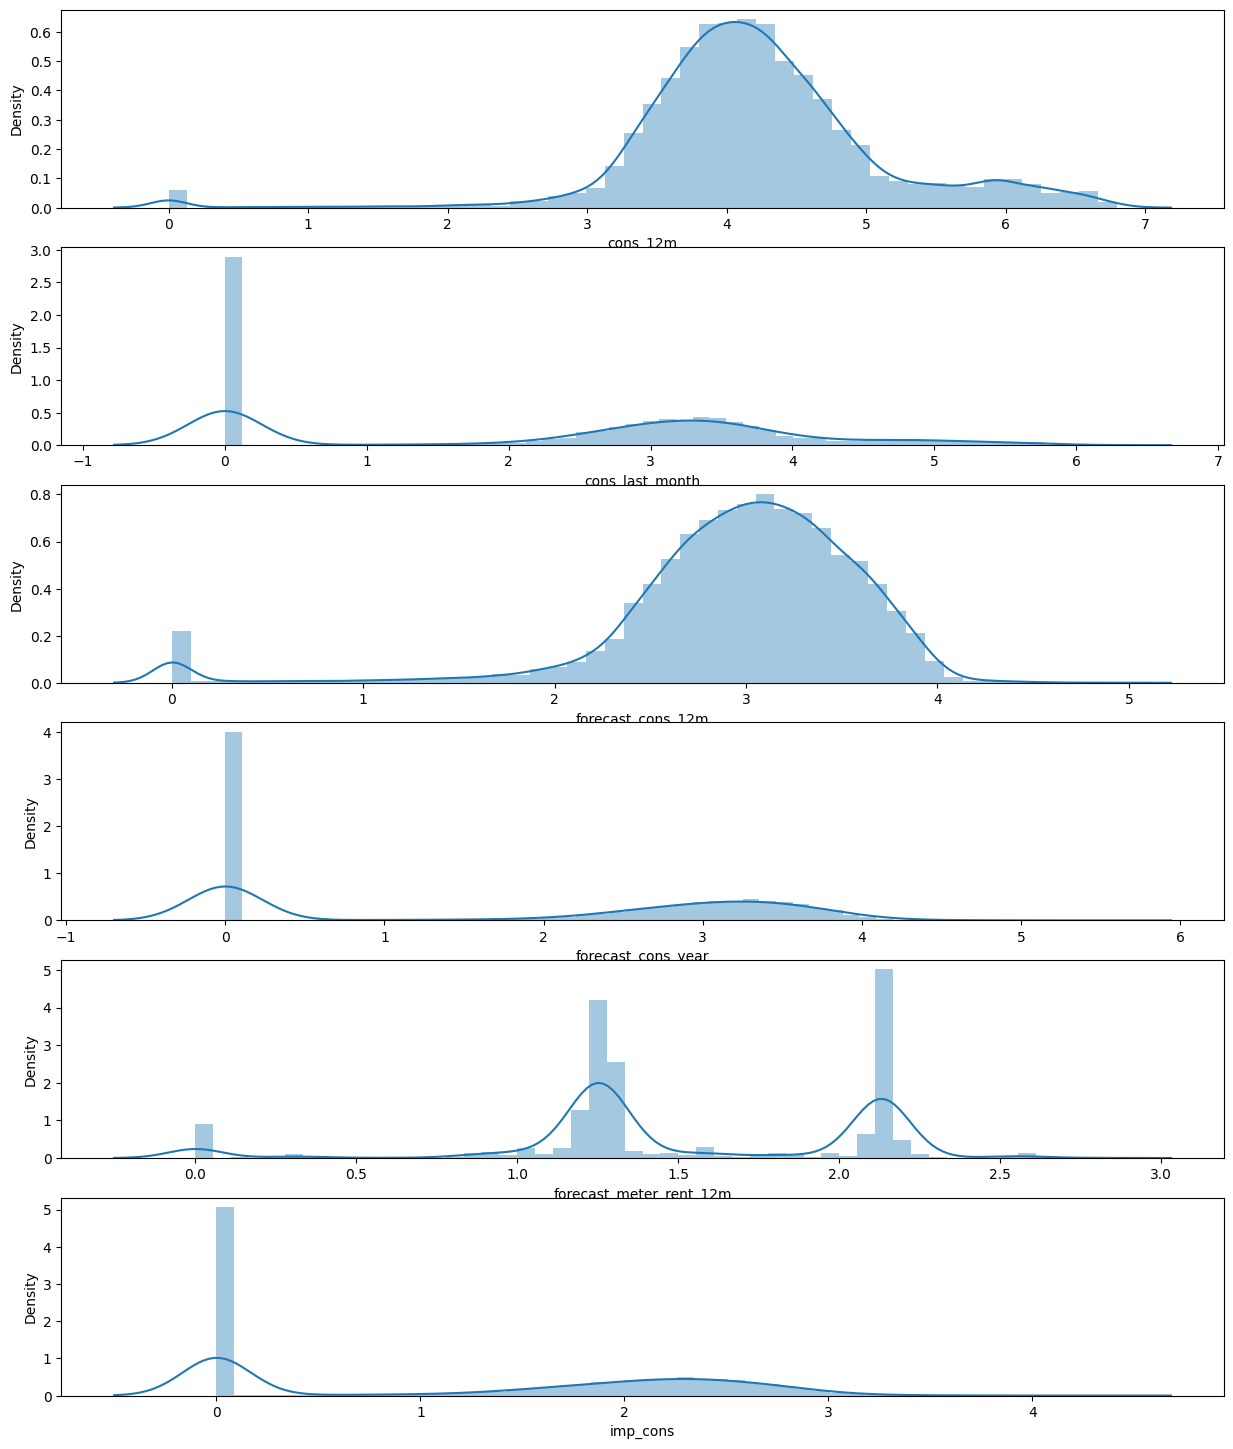

In [62]:
fig, ax = plt.subplots(nrows=6, figsize=(15,18))

sns.distplot(comb_df["cons_12m"], bins=50, ax=ax[0])
sns.distplot(comb_df["cons_last_month"], bins=50, ax=ax[1])
sns.distplot(comb_df["forecast_cons_12m"], bins=50, ax=ax[2])
sns.distplot(comb_df["forecast_cons_year"], bins=50, ax=ax[3])
sns.distplot(comb_df["forecast_meter_rent_12m"], bins=50, ax=ax[4])
sns.distplot(comb_df["imp_cons"], bins=50, ax=ax[5])

In [66]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        14606 non-null  object 
 1   cons_12m                                  14606 non-null  float64
 2   cons_last_month                           14606 non-null  float64
 3   forecast_cons_12m                         14606 non-null  float64
 4   forecast_cons_year                        14606 non-null  float64
 5   forecast_discount_energy                  14606 non-null  float64
 6   forecast_meter_rent_12m                   14606 non-null  float64
 7   forecast_price_energy_off_peak            14606 non-null  float64
 8   forecast_price_energy_peak                14606 non-null  float64
 9   forecast_price_pow_off_peak               14606 non-null  float64
 10  imp_cons                          

<Axes: >

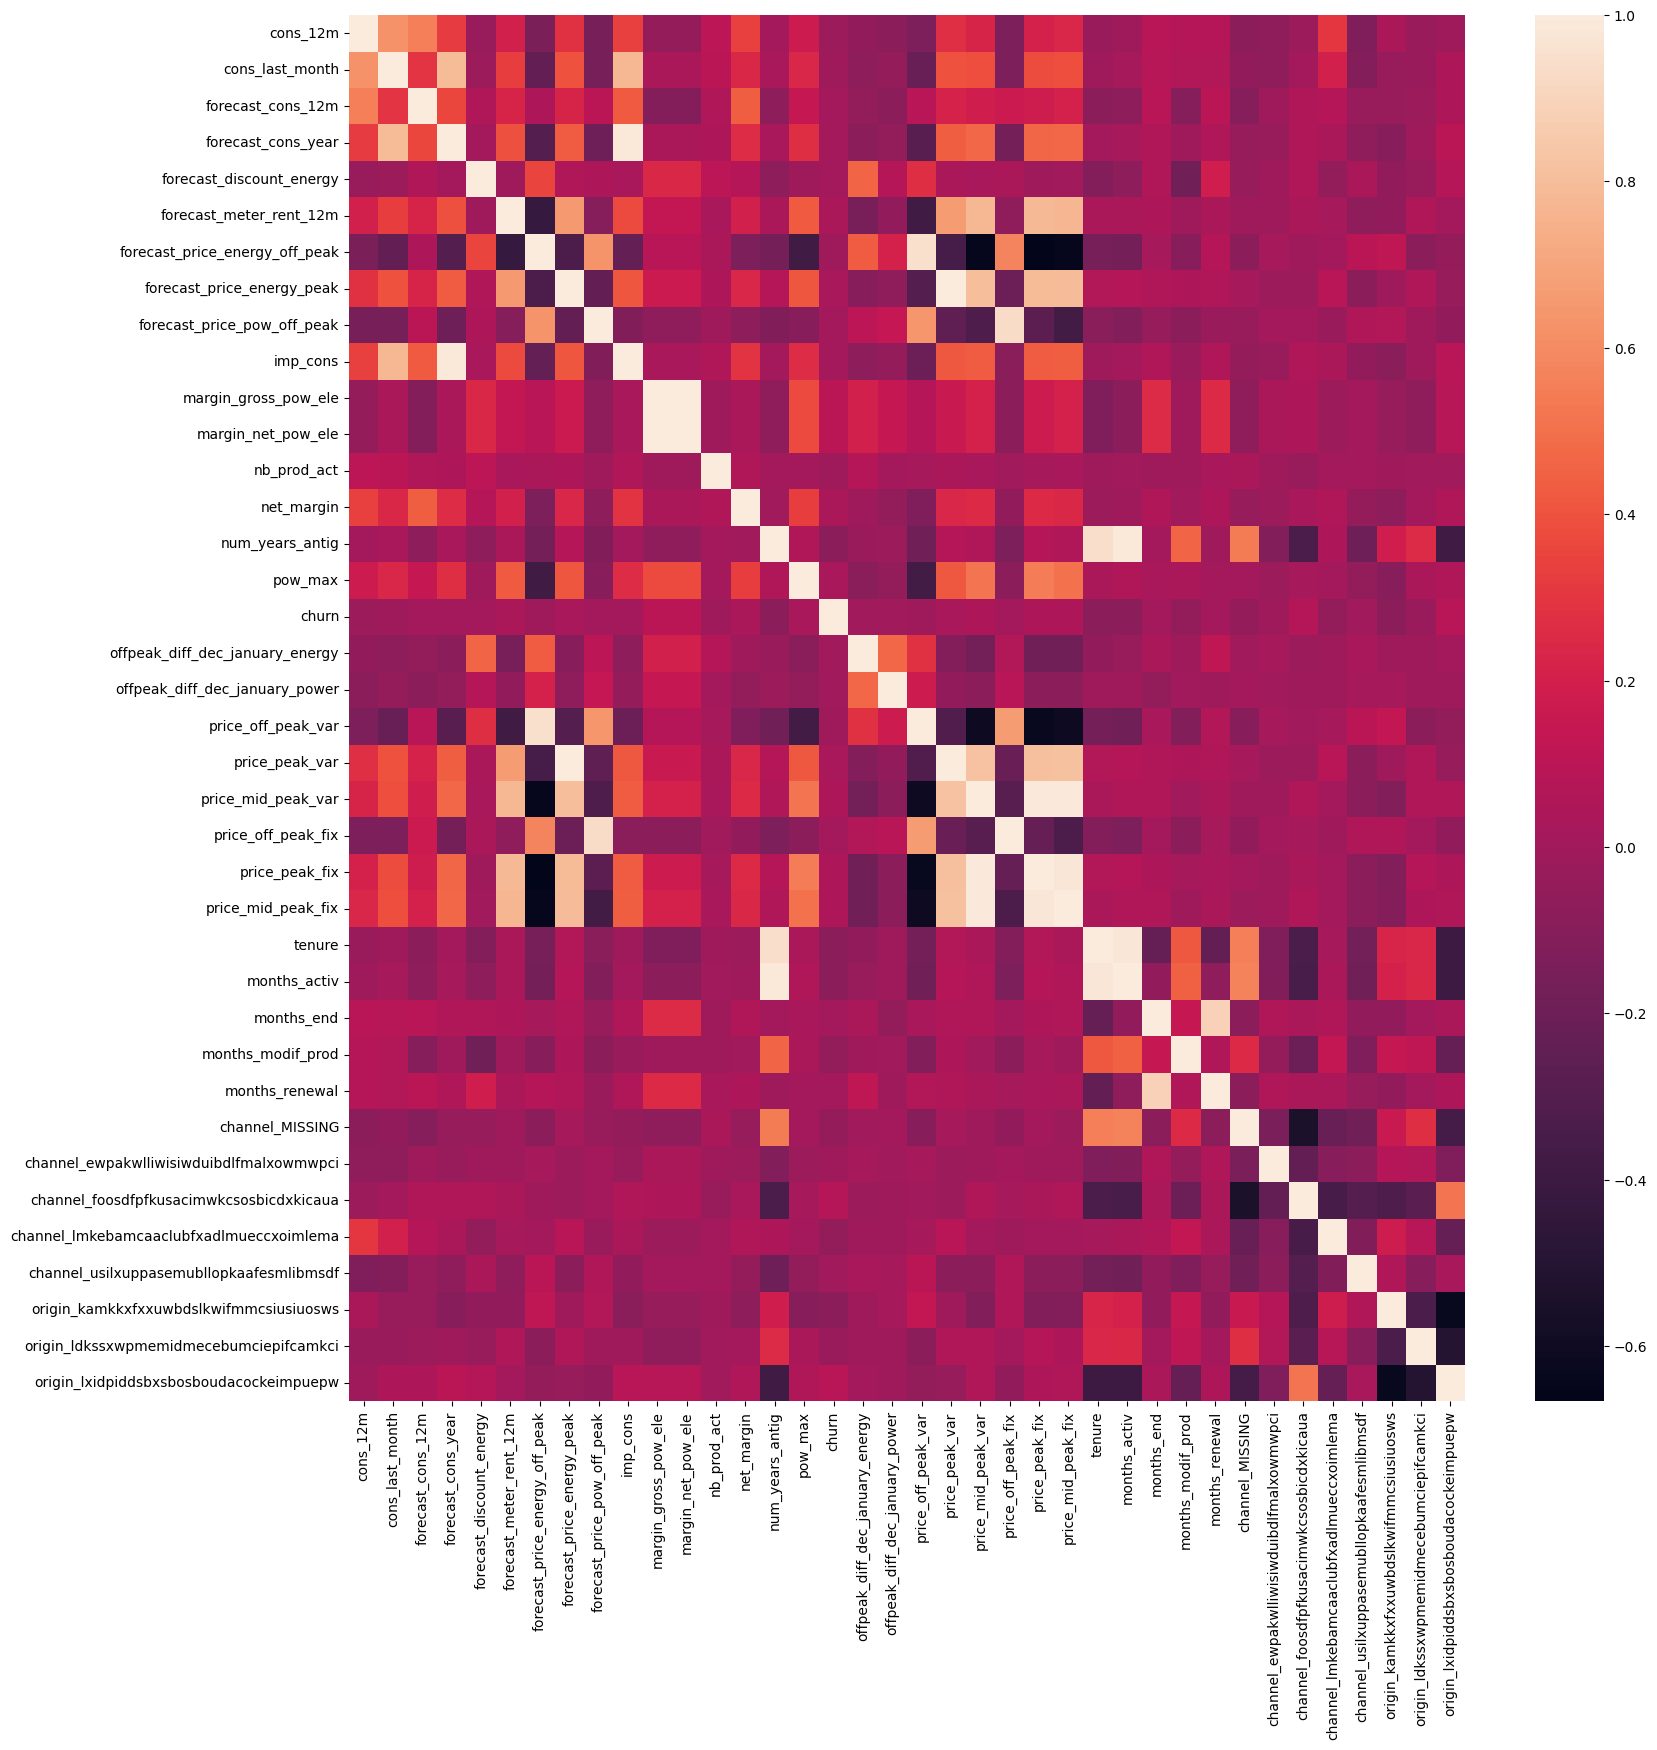

In [70]:
plt.figure(figsize=(18,18))
sns.heatmap(comb_df.drop(["id"], axis=1).corr())

In [71]:
comb_df.drop(["num_years_antig", "forecast_price_energy_off_peak"], axis=1, inplace=True)

In [72]:
comb_df.head()

,id,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,0.000000,0.000000,0.000000,0.0,0.444045,0.098142,40.606701,0.00000,...,14,19,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2.280920,0.000000,0.0,1.237292,0.000000,44.311378,0.00000,...,89,17,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,1.689841,0.000000,0.0,1.599009,0.087899,44.311378,0.00000,...,81,21,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2.382089,0.000000,0.0,1.318689,0.000000,44.311378,0.00000,...,82,22,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,3.646011,2.721811,2.650065,2.721811,0.0,2.122969,0.100015,40.606701,1.72689,...,84,22,True,False,False,False,False,True,False,False


### Modelling

In [75]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
train_df = comb_df.copy()

In [77]:
x = train_df.drop(["id", "churn"], axis=1)
y = train_df["churn"]

print(x.shape)
print(y.shape)

(14606, 35)
(14606,)


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11684, 35)
(2922, 35)
(11684,)
(2922,)


In [113]:
model = RandomForestClassifier(n_estimators=900, max_depth=25, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=900, random_state=42)

In [114]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [111]:
def show_result(act, pred):
    conf_mtx = metrics.confusion_matrix(act, pred) 
    print("Confusion Matrix:\n", conf_mtx)
    print("Accuracy:", metrics.accuracy_score(act, pred))
    print("Precision:", metrics.precision_score(act, pred))
    print("Recall:", metrics.recall_score(act, pred))
    print(metrics.classification_report(act, pred))

In [115]:
show_result(y_train, y_train_pred)
show_result(y_test, y_test_pred)

Confusion Matrix:
 [[10570     0]
 [    2  1112]]
Accuracy: 0.999828825744608
Precision: 1.0
Recall: 0.9982046678635548
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10570
           1       1.00      1.00      1.00      1114

    accuracy                           1.00     11684
   macro avg       1.00      1.00      1.00     11684
weighted avg       1.00      1.00      1.00     11684

Confusion Matrix:
 [[2616    1]
 [ 290   15]]
Accuracy: 0.9004106776180698
Precision: 0.9375
Recall: 0.04918032786885246
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.94      0.05      0.09       305

    accuracy                           0.90      2922
   macro avg       0.92      0.52      0.52      2922
weighted avg       0.90      0.90      0.86      2922



In [116]:
feature_importances = pd.DataFrame({
    "features": x_train.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=True).reset_index()

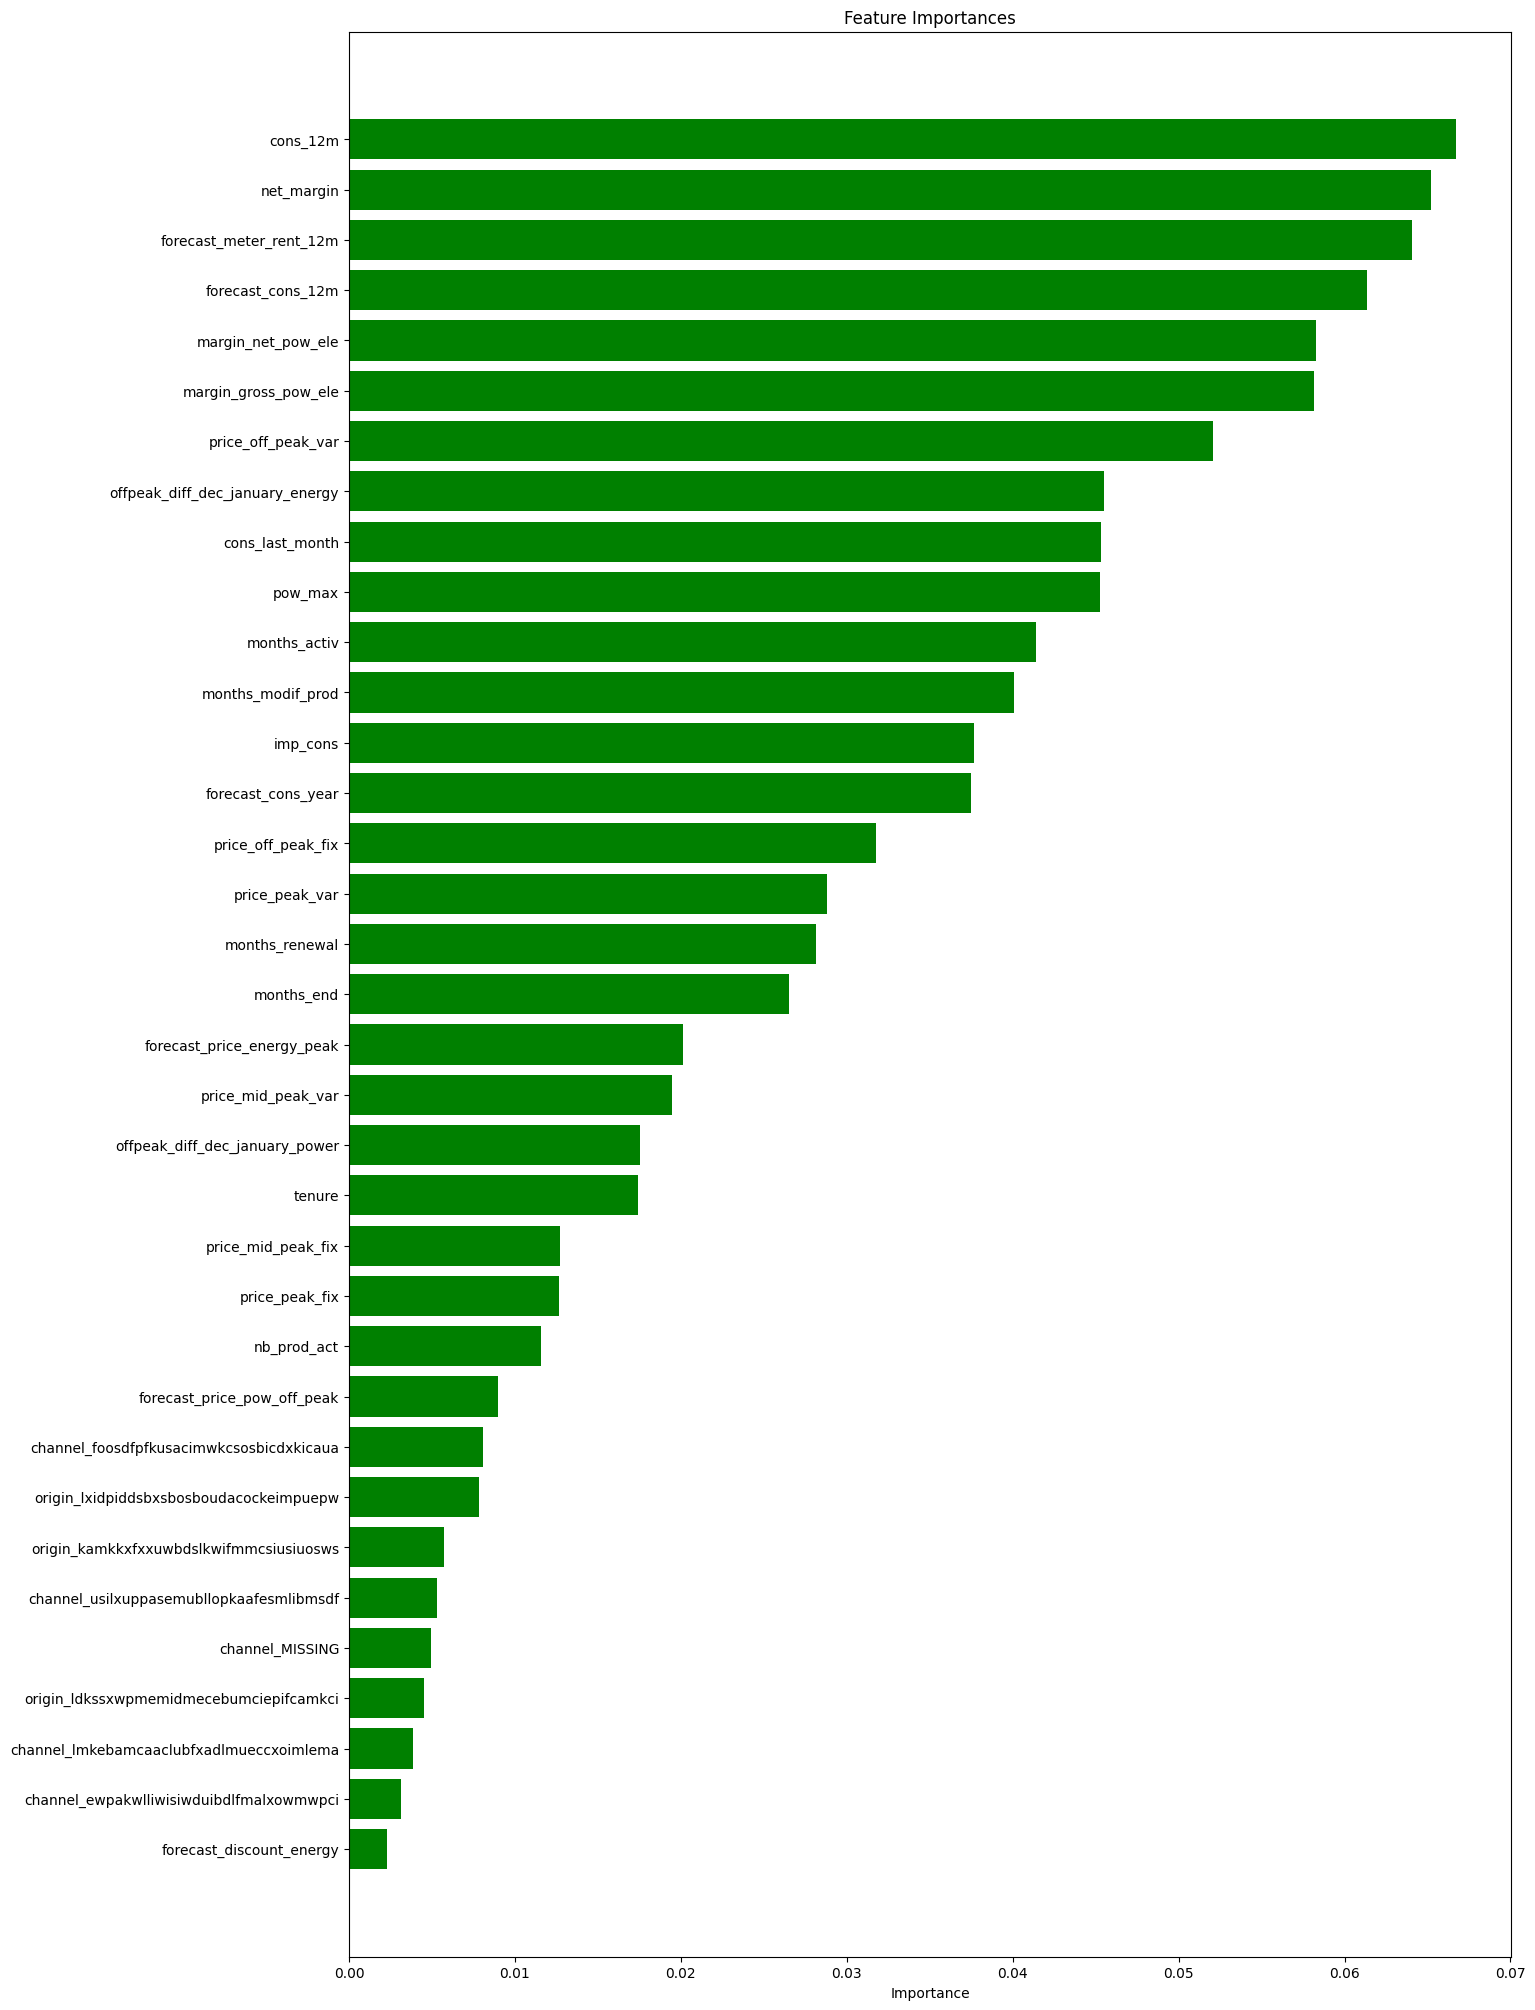

In [117]:
plt.figure(figsize=(15, 25))
plt.title("Feature Importances")
plt.barh(range(len(feature_importances)), feature_importances["importance"], color="g", align="center")
plt.yticks(range(len(feature_importances)), feature_importances["features"])
plt.xlabel("Importance")
plt.show()